In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import chardet

file_path = "spam.csv"

# Dosyayı 'rb' modunda açıp karakter kodlamasını algılama
with open(file_path, 'rb') as x:
    raw_data = x.read(100000)  # Dosyanın belli bir kısmını okuma
    sonuc = chardet.detect(raw_data)

print(sonuc)

# Algılanan kodlamayı kullanarak pandas ile CSV dosyasını okuma
encoding = sonuc['encoding']
data = pd.read_csv(file_path, encoding=encoding)
veri=data.copy()

print(data.head())  # Veri çerçevesinin ilk birkaç satırını yazdırma


# v1 sütünü etiket kısmı 


{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [2]:
veri=veri.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
veri

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
veri=veri.rename(columns={
    "v1":"etiket",
    "v2":"SMS"
})
veri

,etiket,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
veri.groupby("etiket").count()

,SMS
etiket,
ham,4825
spam,747


In [5]:
veri.describe()

,etiket,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
veri=veri.drop_duplicates() #tekrarlananları siliyor
veri.describe()

,etiket,SMS
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [7]:
veri.isnull().sum()

etiket    0
SMS       0
dtype: int64

In [ ]:
# uzunluklarına göre değerlendirme
veri["karakter sayısı"]=veri["SMS"].apply(len)
veri

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

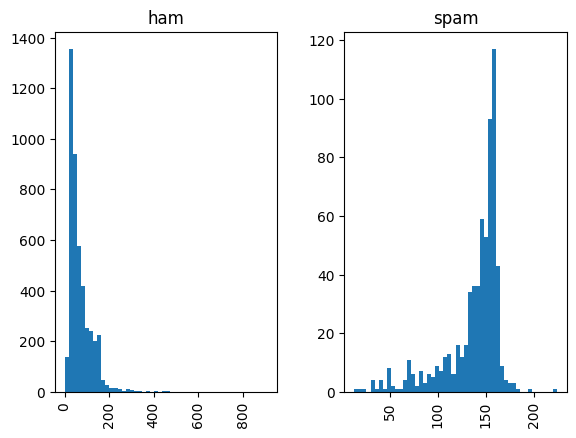

In [9]:
veri.hist(column="karakter sayısı",by="etiket",bins=50) # bins ayrım sayısı

In [ ]:
veri.etiket=[1 if kod=="spam" else 0 for kod in veri.etiket]
veri

In [11]:
# sadece kelimeler kalsın noktalama sayı vs kaldıralım
import re


def harfler(cumle):
    yer=re.compile("[^a-zA-Z]") #yerleri tespit ediyor
    return re.sub(yer," ",cumle)



In [12]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# ingilizce durdurma yükleme örneği
durdurma = stopwords.words('english')
print(durdurma)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\onur eren
[nltk_data]     ejderü\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
spam=[]
ham=[]
tumcumleler=[]
for i in range(len(veri["SMS"].values)):
    r1=veri["SMS"].values[i]
    r2=veri["etiket"].values[i]

    temizcumle=[]

    cumleler=harfler(r1)
    cumleler=cumleler.lower()  #bir kelime cümlenin başında ise büyük harfle başlar fakat aynı kelime cümle içinde de varsa küçükle başlar modele  bunların aynı olduğunu bildirdik

    for kelimeler in cumleler.split():
        temizcumle.append(kelimeler)

        if r2==1:
            spam.append(cumleler)
        else:
            ham.append(cumleler)

    tumcumleler.append(" ".join(temizcumle))


veri["yeni sms"]=tumcumleler
veri

In [14]:
veri=veri.drop(columns=["SMS","karakter sayısı"],axis=1)
veri  #yeni yapımız bu

,etiket,yeni sms
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final ...
3,0,u dun say so early hor u c already then say
4,0,nah i don t think he goes to usf he lives arou...
...,...,...
5567,1,this is the nd time we have tried contact u u ...
5568,0,will b going to esplanade fr home
5569,0,pity was in mood for that so any other suggest...
5570,0,the guy did some bitching but i acted like i d...


In [15]:
#   vektorel yapıya çevirme
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(veri["yeni sms"]).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
y=veri["etiket"]
X=x

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


In [17]:
from sklearn.naive_bayes import MultinomialNB  

nbg=MultinomialNB()
nbg.fit(X_train,y_train)
tahmin=nbg.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
acs=accuracy_score(y_test,tahmin)
acs*100

97.87234042553192

In [ ]:
#model tuning 
import numpy as np 
for i in np.arange(0.0,1.1,0.1):
    model=MultinomialNB(alpha=i)
    model.fit(X_train,y_train)
    tahmin2=model.predict(X_test)
    skor=accuracy_score(y_test,tahmin2)
    print("alfa {} için skor: {}".format(round(i,1),round(skor*100,2)))
